# Plots of the FCI concept

In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from pyFCI import pyFCI
from scipy.spatial import KDTree
from scipy.spatial.distance import pdist, cdist

In [7]:
from matplotlib.patches import Circle

In [8]:
from matplotlib import font_manager
font_file = "/usr/share/fonts/avenir_ff/AvenirLTStd-Roman.ttf"
font_file_b = "/usr/share/fonts/avenir_ff/AvenirLTStd-Black.ttf"
font_file_c = "/usr/share/fonts/avenir_ff/AvenirLTStd-Book.ttf"
font_manager.fontManager.addfont(font_file)
font_manager.fontManager.addfont(font_file_b)
font_manager.fontManager.addfont(font_file_c)

In [9]:
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['image.cmap'] = 'jet'

mpl.rcParams['font.family'] = 'Avenir LT Std'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['font.size'] = 20

mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['axes.labelsize'] = 17
#mpl.rcParams['text.usetex'] = True


#plt.rcParams.update({
#    "text.usetex": True,
#    'font.family': 'Avenir LT Std',
#    "font.sans-serif": ["Computer Modern Roman"],
#    "font.weight": "heavy",
#    "font.size":20,
#    'axes.titlesize': 30,
#    'xtick.labelsize': 17, #20
#    'ytick.labelsize': 17
#    })


In [10]:
myR = "#D81B60"
myG = "#004D40"
myO = "#FE6100"

In [11]:
seed = 235
rng = np.random.default_rng(seed)

In [12]:
basedir = "FCI_graphical_explanation"

## FCI

In [13]:
subdir = "FCI"

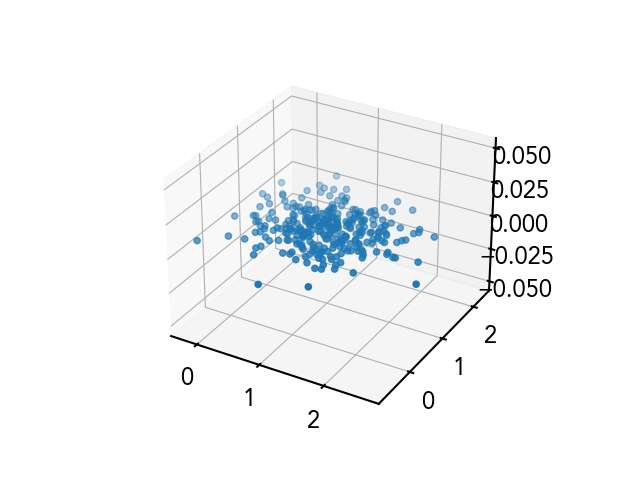

In [14]:
N = 300
d = 2 

#dataset = np.random.rand(N,d)
dataset = rng.normal(loc=1,scale=0.5,size=(N,d))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
if d > 2:
    ax.scatter(dataset[:,0], dataset[:,1], dataset[:,2])
else:
    ax.scatter(dataset[:,0], dataset[:,1])
plt.show()

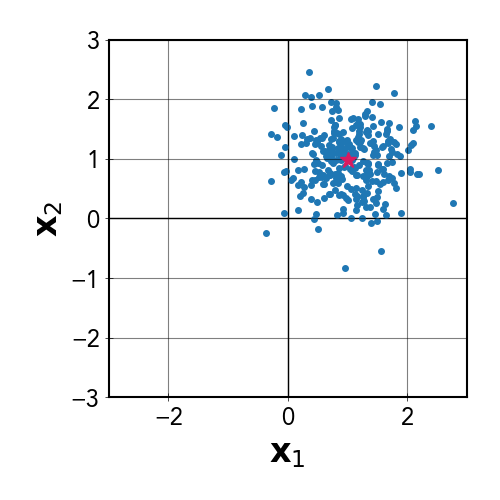

In [15]:
fig, ax = plt.subplots(tight_layout=True, figsize=(5,5))
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(dataset[:,0], dataset[:,1],marker=".")
ax.plot(dataset[:,0].mean(), dataset[:,1].mean(), '*',c=myR, ms=12)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
plt.tight_layout()
plt.savefig(f"{basedir}/{subdir}/FCI_dataset.pdf")
plt.show()

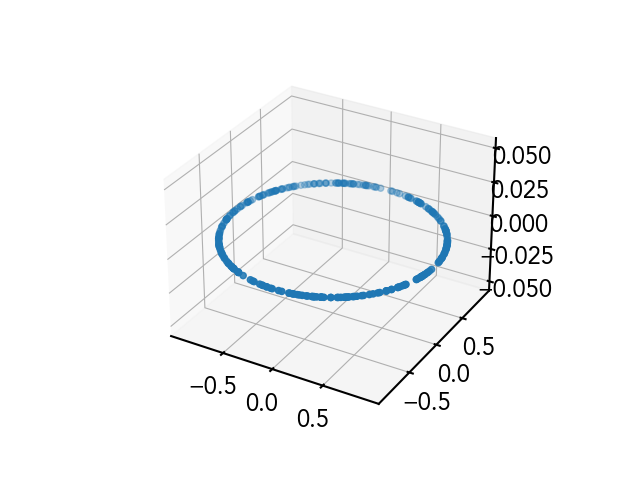

In [16]:
processed_dataset = pyFCI.center_and_normalize(dataset)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
if d > 2:
    ax.scatter(processed_dataset[:,0], processed_dataset[:,1], processed_dataset[:,2])
else:
    ax.scatter(processed_dataset[:,0], processed_dataset[:,1])

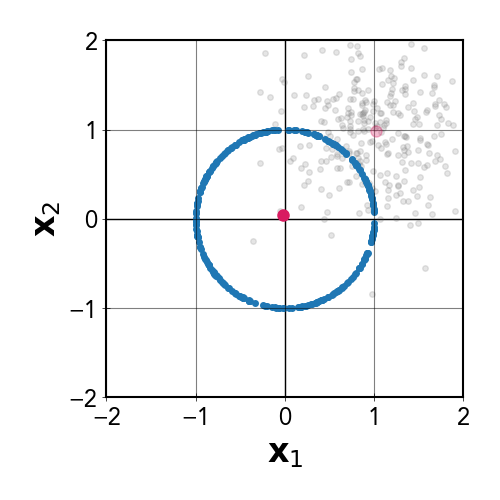

In [17]:
fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(dataset[:,0], dataset[:,1], c="gray",marker=".",alpha=0.2)
ax.plot(dataset[:,0].mean(), dataset[:,1].mean(), 'o',c=myR,alpha=0.3)
ax.scatter(processed_dataset[:,0], processed_dataset[:,1], marker=".")
ax.plot(processed_dataset[:,0].mean(), processed_dataset[:,1].mean(), 'o',c=myR)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
plt.savefig(f"{basedir}/{subdir}/FCI_dataset_processed.pdf")
plt.show()

In [18]:
useful_points = np.where(processed_dataset[:,1] > 0.9)[0]

In [19]:
#center = np.random.choice(len(processed_dataset), size=1)
center = rng.choice(useful_points, size=1)
print(center)

[219]


In [20]:
center = 219

## Paper plots

(array([ 10,  28,  34,  51,  84,  96, 111, 116, 118, 124, 160, 166, 167,
       187, 188, 193, 211, 219, 227, 229, 237, 241, 244, 251, 252, 270,
       272, 291]),)


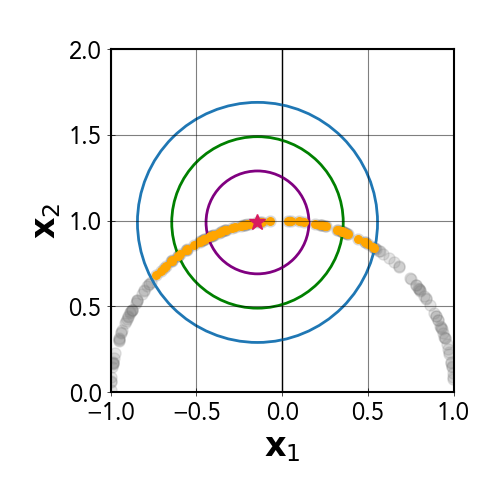

In [21]:
fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(processed_dataset[:,0], processed_dataset[:,1], marker="o",c="gray",alpha=0.2)
ax.plot(processed_dataset[center,0], processed_dataset[center,1], '*',c=myR, ms=12)
circle0 = Circle((processed_dataset[center,0], processed_dataset[center,1]), 0.3, color="purple", fill=False, lw = 2)
ax.add_patch(circle0)
circle1 = Circle((processed_dataset[center,0], processed_dataset[center,1]), 0.5, color="green", fill=False, lw = 2)
ax.add_patch(circle1)
#circle2 = Circle((processed_dataset[center,0], processed_dataset[center,1]), 0.7, color="orange", fill=False, lw = 2)
circle2 = Circle((processed_dataset[center,0], processed_dataset[center,1]), 0.7, color="C0", fill=False, lw = 2)
ax.add_patch(circle2)
incirc0 = np.where(np.sqrt((processed_dataset[:,0]-processed_dataset[center,0])**2+(processed_dataset[:,1]-processed_dataset[center,1])**2)<0.3)
incirc1 = np.where(np.sqrt((processed_dataset[:,0]-processed_dataset[center,0])**2+(processed_dataset[:,1]-processed_dataset[center,1])**2)<0.5)
incirc2 = np.where(np.sqrt((processed_dataset[:,0]-processed_dataset[center,0])**2+(processed_dataset[:,1]-processed_dataset[center,1])**2)<0.7)
print(incirc0)
ax.scatter(processed_dataset[incirc2,0], processed_dataset[incirc2,1], marker="o", s=30, c="orange" )
#ax.scatter(processed_dataset[incirc1,0], processed_dataset[incirc1,1], marker="o", s=20, c="green", alpha=0.6)
#ax.scatter(processed_dataset[incirc0,0], processed_dataset[incirc0,1], marker="o", s=10, c="purple", alpha=0.5)
ax.set_xlim(-1,1)
ax.set_ylim(0,2)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
plt.savefig(f"{basedir}/{subdir}/FCI_dataset_processed_circles.pdf")
plt.show()

In [22]:
fci_plane = pyFCI.FCI(processed_dataset)
dim = pyFCI.fit_FCI(fci_plane)
print(dim)

[2.003467784464684, 1.0000451231395577, 0.0012350637996326453]


In [23]:
xsp = np.linspace(0,2,100)
ysp = pyFCI.analytical_FCI(xsp, dim[0]-1, dim[1])

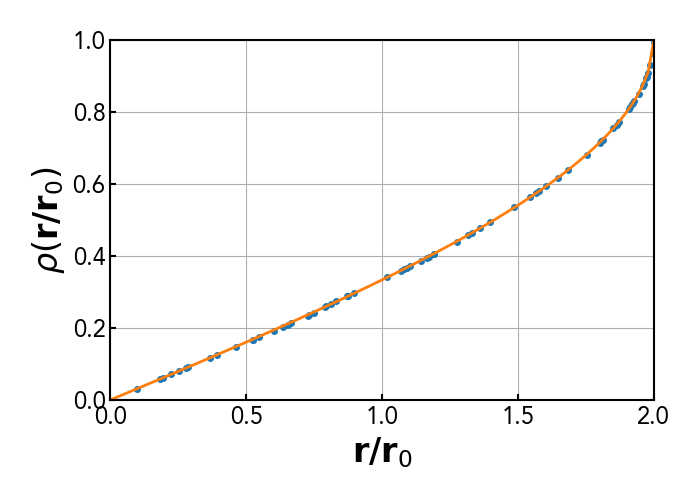

In [24]:
fig, ax = plt.subplots(tight_layout=True, figsize=(7,5))
selected_points_p = np.random.choice(len(fci_plane), size=70, replace=False)
ax.plot(fci_plane[selected_points_p,0], fci_plane[selected_points_p,1], ".",label="Empirical")
ax.plot(xsp, ysp, label="Analytical",lw=2)
ax.set_xlim([0,2])
ax.set_ylim([0,1])
ax.grid(True)

#ax.legend(loc='upper left',fontsize="x-small")
ax.set_xlabel(r"$\mathbf{r/r}_0$", fontsize="large")
ax.set_ylabel(r"$\rho(\mathbf{r/r}_0)$", fontsize="large")
plt.savefig(f"{basedir}/{subdir}/FCI_fitting_example.pdf")
plt.show()

## Large dimension dataset

In [25]:
Nl = 100
dl = 10

ds = np.random.rand(Nl,dl)
processed_datasetl = pyFCI.center_and_normalize(ds)

In [26]:
fci = pyFCI.FCI(processed_datasetl)
fit = pyFCI.fit_FCI(fci)
xs = np.linspace(0,2,100)
ys = pyFCI.analytical_FCI(xs, fit[0]-1, fit[1])

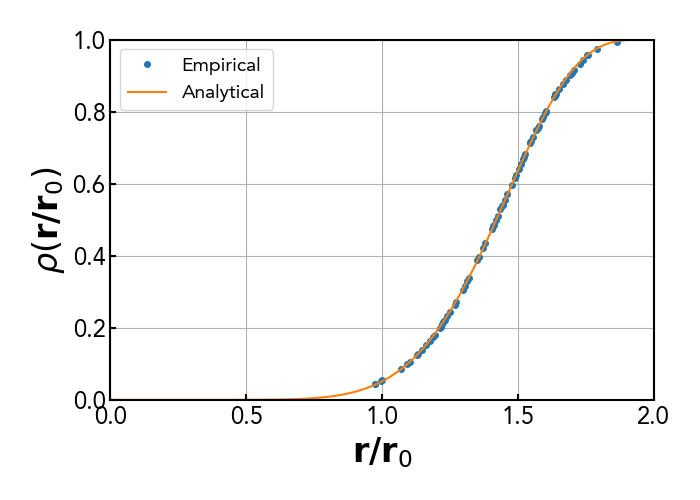

In [73]:
fig, ax = plt.subplots(tight_layout=True, figsize=(7,5))
selected_points = np.random.choice(len(fci), size=80, replace=False)
ax.plot(fci[selected_points,0], fci[selected_points,1], "." ,label="Empirical")
ax.plot(xs, ys, label="Analytical",lw=1.5)
ax.set_xlim([0,2])
ax.set_ylim([0,1])
ax.grid(True)

ax.legend(loc='upper left',fontsize="x-small")
ax.set_xlabel(r"$\mathbf{r/r}_0$", fontsize="large")
ax.set_ylabel(r"$\rho(\mathbf{r/r}_0)$", fontsize="large")
plt.savefig("FCI_example_sigmoid.pdf")
plt.savefig("FCI_example_sigmoid.png", dpi=300)

plt.show()

## Local FCI

Local FCI on the swiss roll dataset

In [28]:
from sklearn.datasets import make_swiss_roll

In [29]:
def compute_id(coords,method = "full"):
    """
    compute the ID using FCI
    default FCI; optional Montecarlo FCI
    """
    coord_norm = pyFCI.center_and_normalize(coords)
    if method == "full":
        fci = pyFCI.FCI(coord_norm)
    elif method == "montecarlo" or method == "mc":
        fci = pyFCI.FCI_MC(coord_norm)
    else:
        print("unknown method")
        return 0
    try:
        fit = pyFCI.fit_FCI(fci)
    except:
        fit = [0, 0, 0]
    return fit[0]

In [30]:
def local_FCI_dist(dataset, centers, ks, fci_method = "full"):
    """
    Given a **dataset** of N d-dimensional points, the index **center** of one of the points and a list of possible neighborhoods **ks**, it estimates the local intrinsic dimension by using **fit_FCI()** of the reduced dataset of the first k-nearest-neighbours of **dataset[center]**, for each k in **ks**

    At the moment, it uses FCI_MC and fit FCI with default parameters

    :param dataset: a vector of shape (N,d)
    :param centers: the indexes of a set of points in **dataset**
    :param ks: list or array of increasing positive integers
    :param fci_method: string indicating the FCI variant to use for ID computation. default 'full', other options: 'montecarlo'('mc')
    :returns local: a vector of shape (len(centers),len(ks),2). For each k in **ks**, returns the list [ k, fitted dimension] 
    :returns selected_dists: a vector of shape (len(centers),len(ks)). For each k in **ks**, returns the list of the distances of the first k nearest neighbors of **dataset[centers]** 
    :returns selected_neighbors_indexes: a vector of shape (len(centers),len(ks)). For each k in **ks**, returns the list of the indexes of the first k nearest neighbors of **dataset[centers]**
    """
    tree = KDTree(dataset)
  
    local = np.empty(shape=(len(centers),len(ks),2))
    k_max = ks[-1]
    selected_dists, neighbors_indexes = tree.query(dataset[centers], k_max + 1, workers=-1)

    for i in range(len(centers)):
        for j, k in enumerate(ks):
            neighbors = dataset[neighbors_indexes[i][:k]]
            fit = compute_id(neighbors, fci_method)
            local[i][j] = [k, fit]

    return local, selected_dists, neighbors_indexes

### Make Swiss Roll

In [31]:
seed = 235
rng = np.random.default_rng(seed)

In [32]:
n_samples = 3000
swiss_roll, t = make_swiss_roll(n_samples, noise=0.)
sorted_idx = np.argsort(t)
swiss_roll = swiss_roll[sorted_idx]
t = t[sorted_idx]

In [33]:
n_centers = 10
centers = rng.choice(len(swiss_roll), size=n_centers, replace=False)

In [34]:
neighborhoods = [100, 1000, 2000, 2500]

In [35]:
ids_swiss, distances_swiss, indexes_neighborhood_swiss = local_FCI_dist(swiss_roll, centers, neighborhoods)

### Paper plots

In [36]:
subdir = "Local_FCI"

In [37]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sp = np.outer(np.cos(u), np.sin(v))
y_sp = np.outer(np.sin(u), np.sin(v))
z_sp = np.outer(np.ones(np.size(u)), np.cos(v))

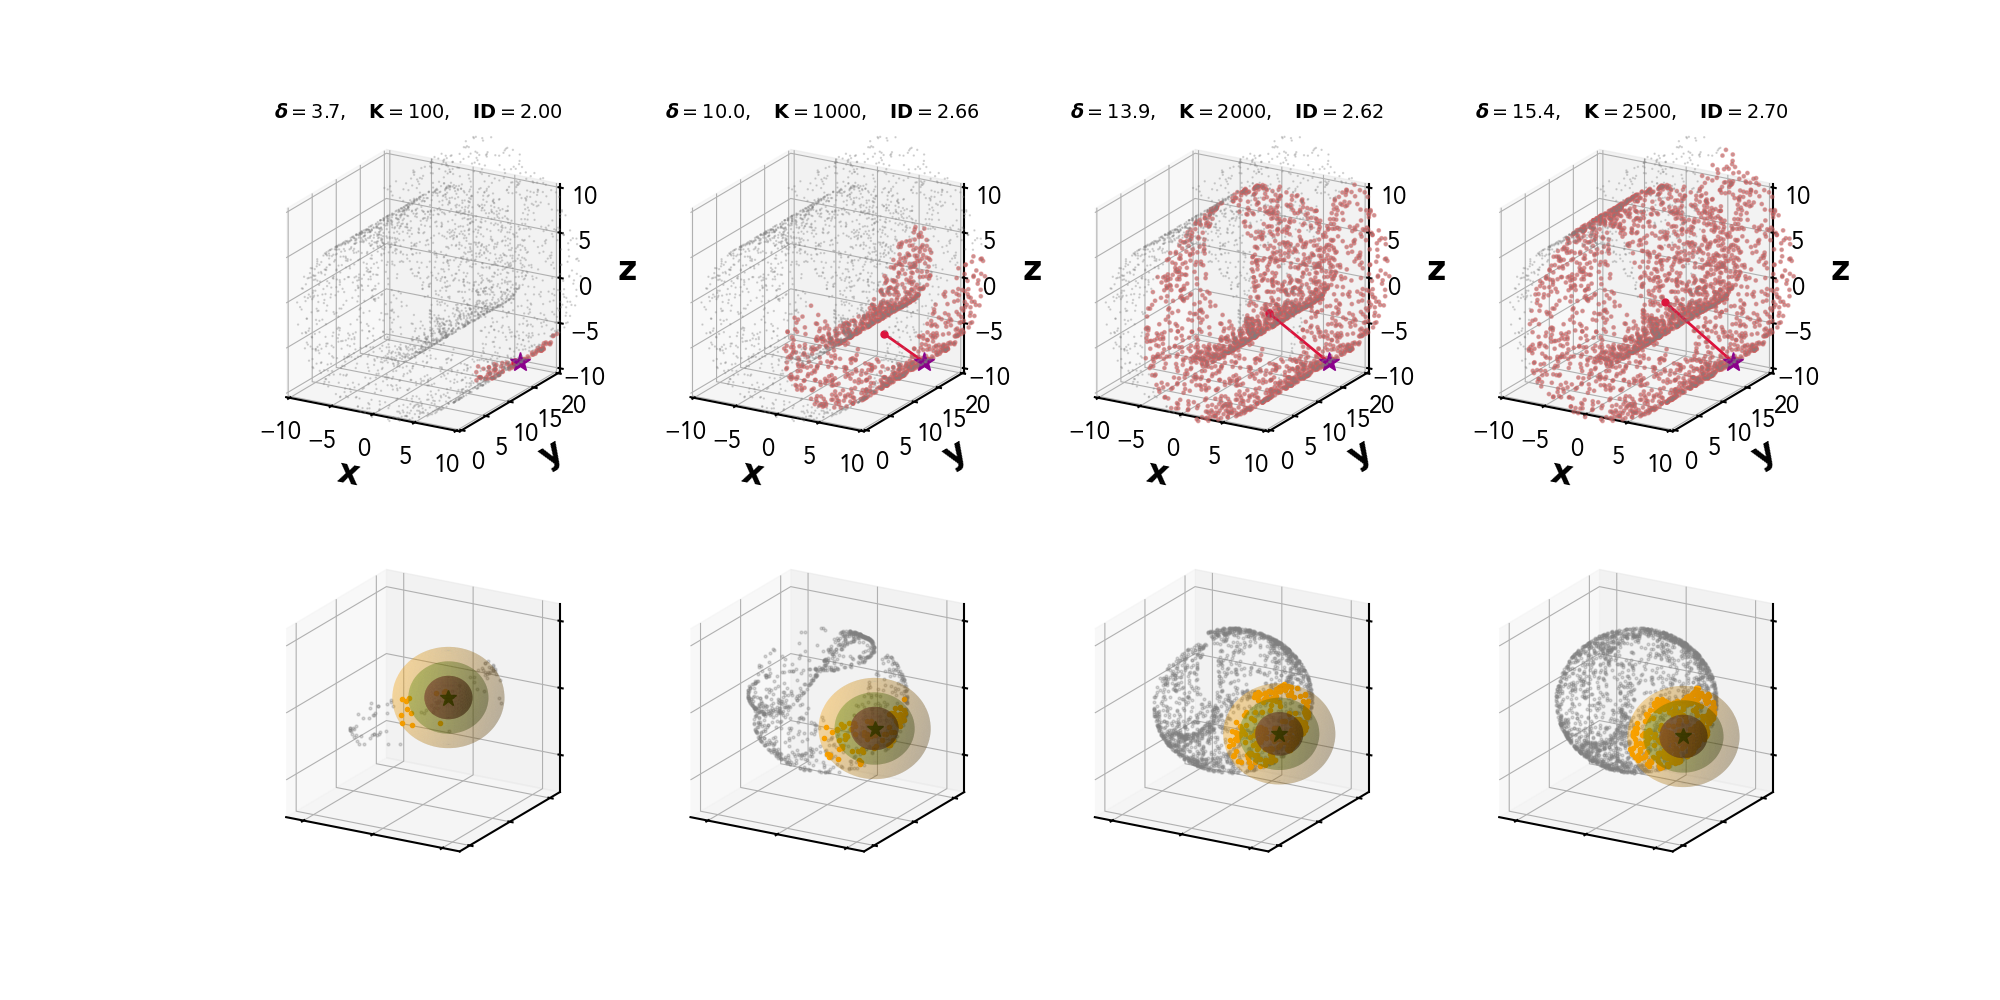

In [38]:
i = 0
fig = plt.figure(figsize=(20,10))
for j, k in enumerate(neighborhoods):
    sample_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
    processed_dataset_swiss = pyFCI.center_and_normalize(sample_swiss)

    bar_sample_s = sample_swiss.mean(axis=0)
    distances_swiss_s = distances_swiss[i,1:k+1]
    bar_dist = np.min(cdist(sample_swiss, bar_sample_s.reshape(1,-1)))
    ndist = distances_swiss_s.mean()

    ax = fig.add_subplot(2,4,j+1,projection='3d', aspect='equal')
    ax.set_proj_type('ortho')
    ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2],s = 0.5, c="grey", alpha=0.3, zorder=2.1)
    ax.scatter(sample_swiss[:, 0], sample_swiss[:, 1], sample_swiss[:, 2],s = 6, c="indianred", alpha=0.5, zorder=2)
    ax.plot([sample_swiss[0, 0],bar_sample_s[0]],[sample_swiss[0, 1], bar_sample_s[1]],[sample_swiss[0, 2], bar_sample_s[2]],marker="o", lw=2, ms = 5, c = "crimson", label = f"k={k}", zorder=2.5)
    ax.plot(sample_swiss[0, 0], sample_swiss[0, 1], sample_swiss[0, 2], ms = 15, c="darkmagenta",marker="*",alpha = 1, zorder=2.9)
    ax.view_init(20,-60)
    ax.set_title(r"$\boldsymbol{\delta} = {%.1f},\quad \mathbf{K} = {%i},\quad \mathbf{ID} = {%.2f}$" % (ndist,k, ids_swiss[i, j, 1]), fontsize="x-small",fontname="Avenir LT Std")

    ax.set_xlim(-10,10)
    ax.set_ylim(0,20)
    ax.set_zlim(-10,10)
    ax.set_xlabel(r'$\mathbf{x}$', fontsize="large", labelpad=10)
    ax.set_ylabel(r'$\mathbf{y}$', fontsize="large", labelpad=10)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r'$\mathbf{z}$', fontsize="large", labelpad=10, rotation="horizontal")
    
    c = processed_dataset_swiss[0]
    incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[0,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[0,1])**2
        +(processed_dataset_swiss[:,2]-processed_dataset_swiss[0,2])**2)<0.7)

    ax3d = fig.add_subplot(2,4,j+5,projection='3d', aspect='equal')
    ax3d.set_proj_type('ortho')
    ax3d.plot(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], "o",c="gray",alpha=0.3,zorder=2.1,ms=2)
    ax3d.plot(processed_dataset_swiss[incirc2,0].T, processed_dataset_swiss[incirc2,1].T, processed_dataset_swiss[incirc2,2].T, "o", color="orange" ,zorder=2.5, ms=3)
    ax3d.plot(processed_dataset_swiss[0,0], processed_dataset_swiss[0,1], processed_dataset_swiss[0,2], '*',c="k", ms=12,zorder=2.8)

    ax3d.plot_surface(x_sp*0.3+c[0], y_sp*0.3+c[1], z_sp*0.3+c[2], alpha=0.5,color= "purple", shade=True, zorder=2.4)
    ax3d.plot_surface(x_sp*0.5+c[0], y_sp*0.5+c[1], z_sp*0.5+c[2], alpha=0.2,color= "green", shade=True, zorder=2.3)
    ax3d.plot_surface(x_sp*0.7+c[0], y_sp*0.7+c[1], z_sp*0.7+c[2], alpha=0.2,color= "orange", shade=True, zorder=2.2)
    ax3d.set_xlim(-1.2,1.2)
    ax3d.set_ylim(-1.2,1.2)
    ax3d.set_zlim(-1.5,1.2)
    ax3d.xaxis.set_tick_params(labelbottom=False)
    ax3d.yaxis.set_tick_params(labelleft=False)
    ax3d.zaxis.set_tick_params(labelleft=False)
    ax3d.view_init(20,-60)
plt.savefig(f"{basedir}/{subdir}/localFCI.pdf")
plt.show()


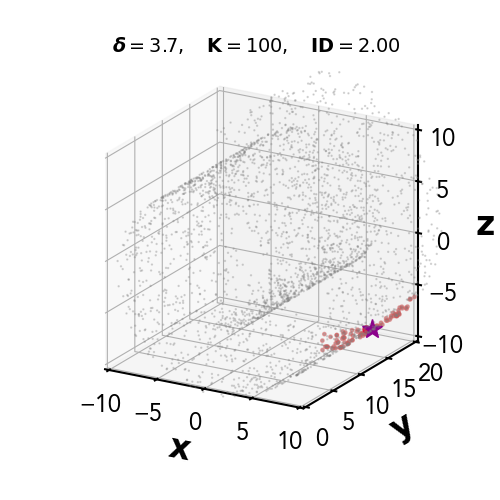

In [75]:
i = 0
fig = plt.figure(figsize=(5,5))
j = 0
k = neighborhoods[j]
sample_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
processed_dataset_swiss = pyFCI.center_and_normalize(sample_swiss)

bar_sample_s = sample_swiss.mean(axis=0)
distances_swiss_s = distances_swiss[i,1:k+1]
bar_dist = np.min(cdist(sample_swiss, bar_sample_s.reshape(1,-1)))
ndist = distances_swiss_s.mean()

ax = fig.add_subplot(projection='3d', aspect='equal')
ax.set_proj_type('ortho')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2],s = 0.5, c="grey", alpha=0.3, zorder=2.1)
ax.scatter(sample_swiss[:, 0], sample_swiss[:, 1], sample_swiss[:, 2],s = 6, c="indianred", alpha=0.5, zorder=2)
ax.plot([sample_swiss[0, 0],bar_sample_s[0]],[sample_swiss[0, 1], bar_sample_s[1]],[sample_swiss[0, 2], bar_sample_s[2]],marker="o", lw=2, ms = 5, c = "crimson", label = f"k={k}", zorder=2.5)
ax.plot(sample_swiss[0, 0], sample_swiss[0, 1], sample_swiss[0, 2], ms = 15, c="darkmagenta",marker="*",alpha = 1, zorder=2.9)
ax.view_init(20,-60)
ax.set_title(r"$\boldsymbol{\delta} = {%.1f},\quad \mathbf{K} = {%i},\quad \mathbf{ID} = {%.2f}$" % (ndist,k, ids_swiss[i, j, 1]), fontsize="x-small",fontname="Avenir LT Std")

ax.set_xlim(-10,10)
ax.set_ylim(0,20)
ax.set_zlim(-10,10)
ax.set_xlabel(r'$\mathbf{x}$', fontsize="large", labelpad=10)
ax.set_ylabel(r'$\mathbf{y}$', fontsize="large", labelpad=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\mathbf{z}$', fontsize="large", labelpad=10, rotation="horizontal")
    
plt.savefig("localFCI_smallNeighborhood.pdf")
plt.savefig("localFCI_smallNeighborhood.png", dpi=300)
plt.show()


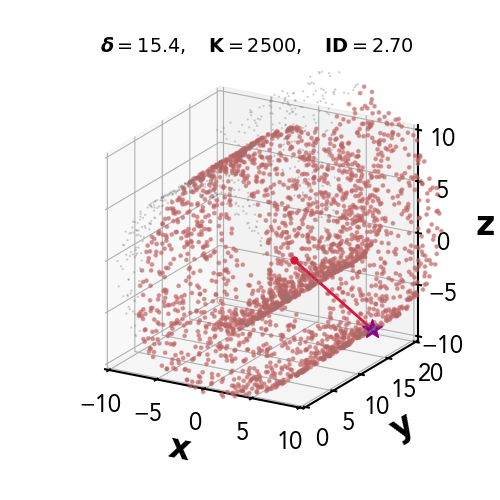

In [76]:
i = 0
fig = plt.figure(figsize=(5,5))
j = 3
k = neighborhoods[j]
sample_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
processed_dataset_swiss = pyFCI.center_and_normalize(sample_swiss)

bar_sample_s = sample_swiss.mean(axis=0)
distances_swiss_s = distances_swiss[i,1:k+1]
bar_dist = np.min(cdist(sample_swiss, bar_sample_s.reshape(1,-1)))
ndist = distances_swiss_s.mean()

ax = fig.add_subplot(projection='3d', aspect='equal')
ax.set_proj_type('ortho')
ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2],s = 0.5, c="grey", alpha=0.3, zorder=2.1)
ax.scatter(sample_swiss[:, 0], sample_swiss[:, 1], sample_swiss[:, 2],s = 6, c="indianred", alpha=0.5, zorder=2)
ax.plot([sample_swiss[0, 0],bar_sample_s[0]],[sample_swiss[0, 1], bar_sample_s[1]],[sample_swiss[0, 2], bar_sample_s[2]],marker="o", lw=2, ms = 5, c = "crimson", label = f"k={k}", zorder=2.5)
ax.plot(sample_swiss[0, 0], sample_swiss[0, 1], sample_swiss[0, 2], ms = 15, c="darkmagenta",marker="*",alpha = 1, zorder=2.9)
ax.view_init(20,-60)
ax.set_title(r"$\boldsymbol{\delta} = {%.1f},\quad \mathbf{K} = {%i},\quad \mathbf{ID} = {%.2f}$" % (ndist,k, ids_swiss[i, j, 1]), fontsize="x-small",fontname="Avenir LT Std")

ax.set_xlim(-10,10)
ax.set_ylim(0,20)
ax.set_zlim(-10,10)
ax.set_xlabel(r'$\mathbf{x}$', fontsize="large", labelpad=10)
ax.set_ylabel(r'$\mathbf{y}$', fontsize="large", labelpad=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\mathbf{z}$', fontsize="large", labelpad=10, rotation="horizontal")
    
plt.savefig("localFCI_largeNeighborhood.pdf")
plt.savefig("localFCI_largeNeighborhood.png", dpi=300)
plt.show()


### Random plots

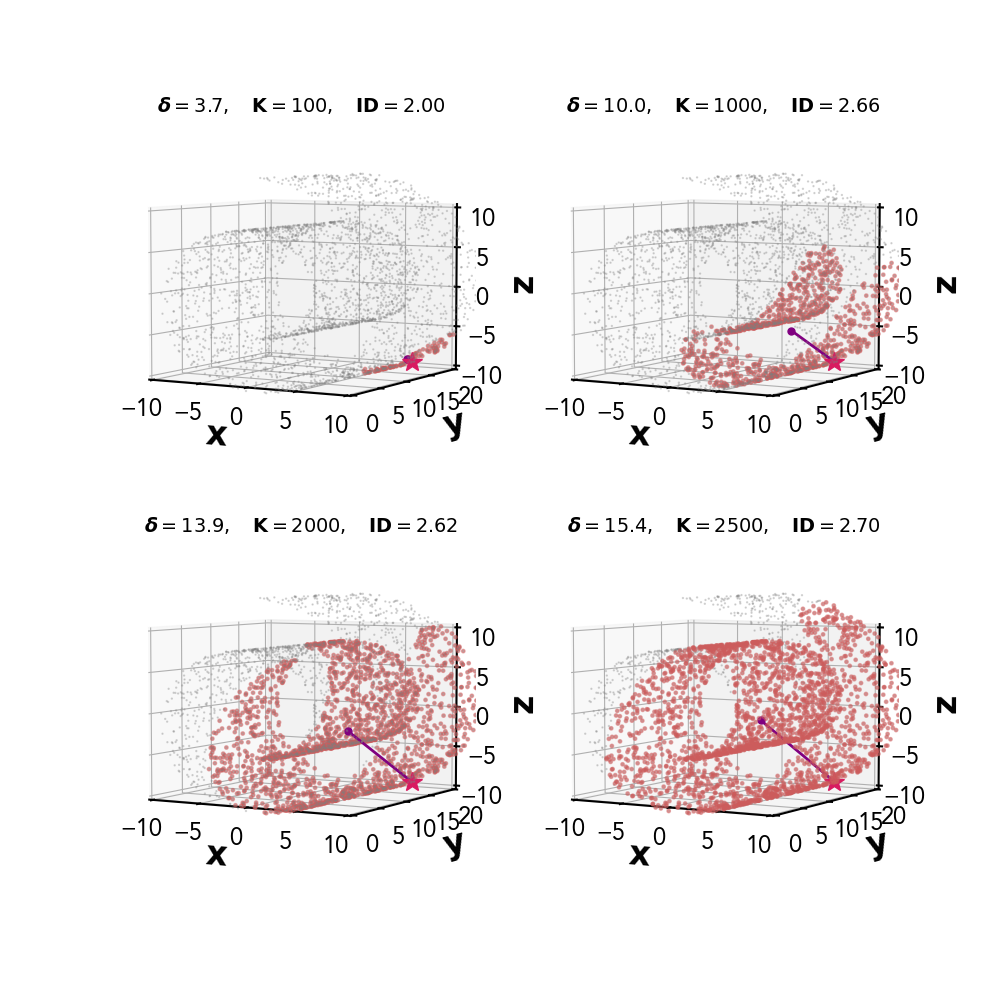

In [39]:
i = 0
fig = plt.figure(figsize=(10,10))
for j, k in enumerate(neighborhoods):
    ax = fig.add_subplot(2,2,j+1,projection='3d')
    sample_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
    bar_sample_s = sample_swiss.mean(axis=0)
    distances_swiss_s = distances_swiss[i,1:k+1]
    ax.scatter(swiss_roll[:, 0], swiss_roll[:, 1], swiss_roll[:, 2],s = 0.5, c="grey", alpha=0.3, zorder=2.1)
    #ax.scatter(sample_swiss[:, 0], sample_swiss[:, 1], sample_swiss[:, 2],s = 6, c=t[indexes_neighborhood_swiss[i,:k]], cmap= 'jet',vmin=t[0],vmax=t[-1], alpha=1)
    ax.scatter(sample_swiss[:, 0], sample_swiss[:, 1], sample_swiss[:, 2],s = 6, c="indianred", alpha=0.5, zorder=2)
    ax.plot([sample_swiss[0, 0],bar_sample_s[0]],[sample_swiss[0, 1], bar_sample_s[1]],[sample_swiss[0, 2], bar_sample_s[2]],marker="o", lw=2, ms = 5, c = "purple", label = f"k={k}", zorder=2.5)
    ax.plot(sample_swiss[0, 0], sample_swiss[0, 1], sample_swiss[0, 2], ms = 15, c=myR,marker="*",alpha = 1, zorder=2.8)
    ax.view_init(5,-60,0)
    bar_dist = np.min(cdist(sample_swiss, bar_sample_s.reshape(1,-1)))
    ndist = distances_swiss_s.mean()
    #ax.set_title(r"$\mathbf{\delta}$"+f"={ndist:.1f}, K={k}, ID={ids_swiss[i, j, 1]:.2f}", fontsize="small")
    ax.set_title(r"$\boldsymbol{\delta} = {%.1f},\quad \mathbf{K} = {%i},\quad \mathbf{ID} = {%.2f}$" % (ndist,k, ids_swiss[i, j, 1]), fontsize="x-small",fontname="Avenir LT Std")
    #ax.legend(fontsize="x-small")

    ax.set_xlabel(r'$\mathbf{x}$', fontsize="large", labelpad=10)
    ax.set_ylabel(r'$\mathbf{y}$', fontsize="large", labelpad=10)
    ax.set_zlabel(r'$\mathbf{z}$', fontsize="large", labelpad=10)
    ax.set_xlim(-10,10)
    ax.set_ylim(0,20)
    ax.set_zlim(-10,10)
plt.show()


In [40]:
i = 0
k = 100
dataset_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
processed_dataset_swiss = pyFCI.center_and_normalize(dataset_swiss)

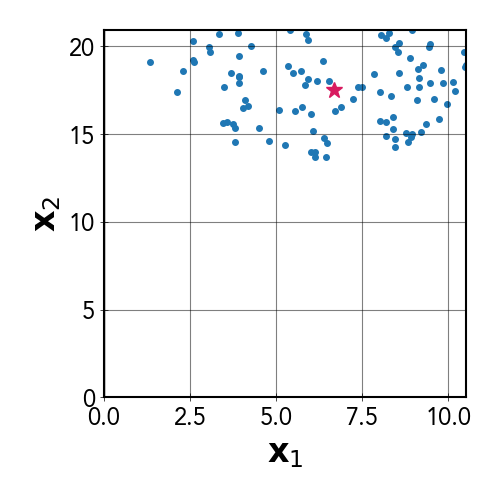

In [41]:
fig, ax = plt.subplots(tight_layout=True, figsize=(5,5))
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(dataset_swiss[:,0], dataset_swiss[:,1],marker=".")
ax.plot(dataset_swiss[:,0].mean(), dataset_swiss[:,1].mean(), '*',c=myR, ms=12)
#ax.set_xlim(-3,3)
#ax.set_ylim(-3,3)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
#ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
plt.tight_layout()
#plt.savefig("FCI_dataset_swiss.pdf")
plt.show()

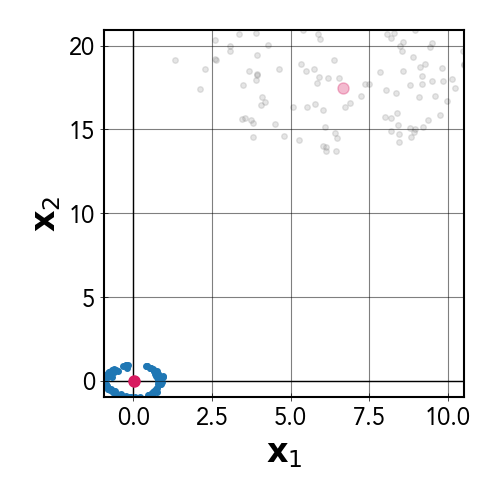

In [42]:
fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(dataset_swiss[:,0], dataset_swiss[:,1], c="gray",marker=".",alpha=0.2)
ax.plot(dataset_swiss[:,0].mean(), dataset_swiss[:,1].mean(), 'o',c=myR,alpha=0.3)
ax.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], marker=".")
ax.plot(processed_dataset_swiss[:,0].mean(), processed_dataset_swiss[:,1].mean(), 'o',c=myR)
#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
#ax.set_aspect('equal')
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
#plt.savefig("FCI_dataset_swiss_processed.pdf")
plt.show()

In [43]:
print(centers[i])
print(swiss_roll[centers[i]])
print(dataset_swiss[0])

2136
[ 6.3626476  19.14912417 -9.67230857]
[ 6.3626476  19.14912417 -9.67230857]


In [44]:
center_swiss = 0

In [45]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

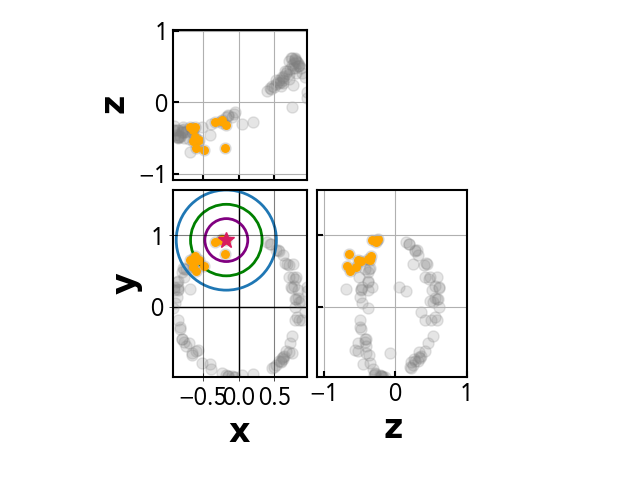

In [46]:
#fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
fig, ax = plt.subplots(tight_layout=True)
ax.axvline(0, color='k', linewidth=1, zorder=0)
ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2)
ax.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], '*',c=myR, ms=12)
circle0 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.3, color="purple", fill=False, lw = 2)
ax.add_patch(circle0)
circle1 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.5, color="green", fill=False, lw = 2)
ax.add_patch(circle1)
#circle2 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.7, color="orange", fill=False, lw = 2)
circle2 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.7, color="C0", fill=False, lw = 2)
ax.add_patch(circle2)
incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2#)<0.7)
    +(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
ax.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" )
#ax.scatter(processed_dataset_swiss[incirc1,0], processed_dataset_swiss[incirc1,1], marker="o", s=20, c="green", alpha=0.6)
#ax.scatter(processed_dataset_swiss[incirc0,0], processed_dataset_swiss[incirc0,1], marker="o", s=10, c="purple", alpha=0.5)
ax.set_xlim(-1.6,1.6)
ax.set_ylim(-1.2,2)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
divider = make_axes_locatable(ax)
ax_xz = divider.append_axes("top", 1.5, pad=0.1, sharex=ax)
ax_yz = divider.append_axes("right", 1.5, pad=0.1, sharey=ax)

ax_xz.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,2], marker="o",c="gray",alpha=0.2)
ax_xz.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,2], marker="o", s=30, c="orange" )
ax_yz.scatter(processed_dataset_swiss[:,2], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2)
ax_yz.scatter(processed_dataset_swiss[incirc2,2], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" )

ax_xz.xaxis.set_tick_params(labelbottom=False)
ax_yz.yaxis.set_tick_params(labelleft=False)
ax.set_aspect('equal')
ax_xz.grid(True)
ax_yz.grid(True)
ax.set_xlabel(r"$\mathbf{x}$", fontsize="large")
ax.set_ylabel(r"$\mathbf{y}$",fontsize="large")
ax_xz.axis("equal")
ax_yz.axis("equal")
ax_xz.set_ylabel(r"$\mathbf{z}$",fontsize="large")
ax_yz.set_xlabel(r"$\mathbf{z}$",fontsize="large")
#plt.savefig("FCI_dataset_swiss_processed_circles.pdf")
plt.show()

In [47]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sp = 1 * np.outer(np.cos(u), np.sin(v))
y_sp = 1 * np.outer(np.sin(u), np.sin(v))
z_sp = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
insp_x = 0.7 * np.outer(np.cos(u), np.sin(v)) + processed_dataset_swiss[center_swiss,0]
insp_y = 0.7 * np.outer(np.sin(u), np.sin(v)) + processed_dataset_swiss[center_swiss,1]
insp_z = 0.7 * np.outer(np.ones(np.size(u)), np.cos(v)) + processed_dataset_swiss[center_swiss,2]

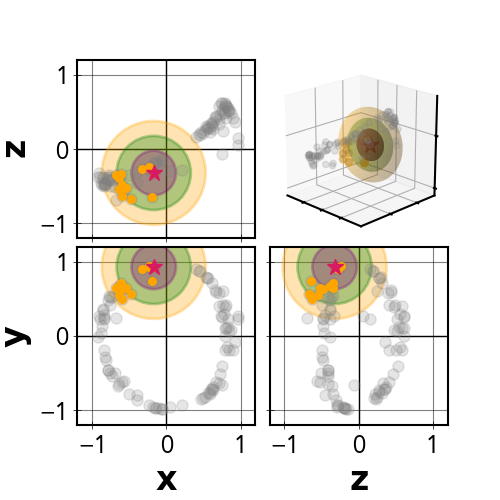

In [48]:
incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2#)<0.7)
    +(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
#fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
c = processed_dataset_swiss[center_swiss]
fig = plt.figure(figsize=(5,5))
ax3d = fig.add_subplot(222, projection='3d', aspect='equal')
ax3d.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], marker="o",c="gray",alpha=0.2)
ax3d.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], '*',c=myR, ms=12,zorder=2.6)
ax3d.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,1], processed_dataset_swiss[incirc2,2], marker="o", s=30, c="orange" )
ax3d.plot_surface(x_sp*0.3+c[0], y_sp*0.3+c[1], z_sp*0.3+c[2], alpha=0.5,color= "purple", shade=True)
ax3d.plot_surface(x_sp*0.5+c[0], y_sp*0.5+c[1], z_sp*0.5+c[2], alpha=0.2,color= "green", shade=True)
ax3d.plot_surface(x_sp*0.7+c[0], y_sp*0.7+c[1], z_sp*0.7+c[2], alpha=0.2,color= "orange", shade=True)
ax3d.xaxis.set_tick_params(labelbottom=False)
ax3d.yaxis.set_tick_params(labelleft=False)
ax3d.zaxis.set_tick_params(labelleft=False)
ax3d.view_init(20,-45)

ax_xy = fig.add_subplot(223, aspect='equal')
ax_xy.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2,zorder=2.4)
ax_xy.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" ,zorder=2.5)
ax_xy.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], '*',c=myR, ms=12,zorder=2.6)
circle0 = Circle((c[0],c[1]), 0.3, color="purple", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle1 = Circle((c[0],c[1]), 0.5, color="green", fill=True, lw = 2,zorder=2.2, alpha=0.3)
circle2 = Circle((c[0],c[1]), 0.7, color="orange", fill=True, lw = 2,zorder=2.1, alpha=0.3)
ax_xy.add_patch(circle0)
ax_xy.add_patch(circle1)
ax_xy.add_patch(circle2)
ax_xy.set_xlim(-1.2,1.2)
ax_xy.set_ylim(-1.2,1.2)
ax_xy.grid(True)

ax_xz = fig.add_subplot(221, sharex = ax_xy, aspect='equal')
ax_xz.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,2], marker="o",c="gray",alpha=0.2,zorder=2.4)
ax_xz.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,2], marker="o", s=30, c="orange",zorder=2.5 )
ax_xz.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,2], '*',c=myR, ms=12,zorder=2.6)
ax_xz.xaxis.set_tick_params(labelbottom=False)
circle0 = Circle((c[0],c[2]), 0.3, color="purple", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle1 = Circle((c[0],c[2]), 0.5, color="green", fill=True, lw = 2,zorder=2.2, alpha=0.3)
circle2 = Circle((c[0],c[2]), 0.7, color="orange", fill=True, lw = 2,zorder=2.1, alpha=0.3)
ax_xz.add_patch(circle0)
ax_xz.add_patch(circle1)
ax_xz.add_patch(circle2)
ax_xz.set_xlim(-1.2,1.2)
ax_xz.set_ylim(-1.2,1.2)
ax_xz.grid(True)

ax_yz = fig.add_subplot(224, sharey = ax_xy, aspect='equal')
ax_yz.scatter(processed_dataset_swiss[:,2], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2,zorder=2.4)
ax_yz.scatter(processed_dataset_swiss[incirc2,2], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" ,zorder=2.5)
ax_yz.plot(processed_dataset_swiss[center_swiss,2], processed_dataset_swiss[center_swiss,1], '*',c=myR, ms=12,zorder=2.6)
ax_yz.yaxis.set_tick_params(labelleft=False)
circle0 = Circle((c[2],c[1]), 0.3, color="purple", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle1 = Circle((c[2],c[1]), 0.5, color="green", fill=True, lw = 2,zorder=2.2, alpha=0.3)
circle2 = Circle((c[2],c[1]), 0.7, color="orange", fill=True, lw = 2,zorder=2.1, alpha=0.3)
ax_yz.add_patch(circle0)
ax_yz.add_patch(circle1)
ax_yz.add_patch(circle2)
ax_yz.set_xlim(-1.2,1.2)
ax_yz.set_ylim(-1.2,1.2)
ax_yz.grid(True)

ax_xy.axvline(0, color='k', linewidth=1, zorder=0)
ax_xy.axhline(0, color='k', linewidth=1, zorder=0)

ax_xz.axvline(0, color='k', linewidth=1, zorder=0)
ax_xz.axhline(0, color='k', linewidth=1, zorder=0)

ax_yz.axvline(0, color='k', linewidth=1, zorder=0)
ax_yz.axhline(0, color='k', linewidth=1, zorder=0)

ax3d.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_xy.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_xz.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_yz.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)

ax_xy.set_xlabel(r"$\mathbf{x}$", fontsize="large")
ax_xy.set_ylabel(r"$\mathbf{y}$",fontsize="large")
ax_xz.set_ylabel(r"$\mathbf{z}$",fontsize="large")
ax_yz.set_xlabel(r"$\mathbf{z}$",fontsize="large")
#plt.savefig("FCI_dataset_swiss_processed_circles.pdf")
plt.subplots_adjust(bottom=0.15,  left=0.15, hspace=0.05, wspace = 0.05)
plt.show()

In [49]:
i = 1
k = 100
dataset_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
processed_dataset_swiss = pyFCI.center_and_normalize(dataset_swiss)

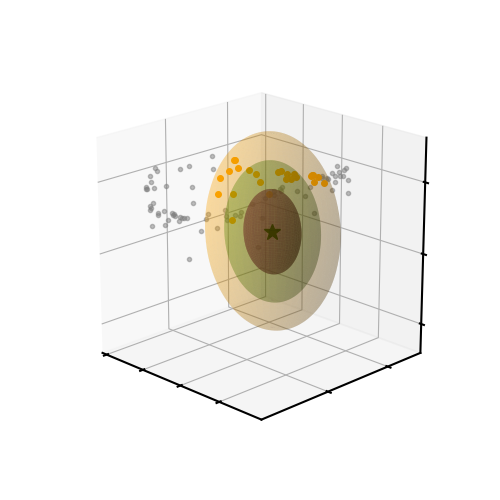

In [50]:
incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2#)<0.7)
    +(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
#fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
c = processed_dataset_swiss[center_swiss]
fig = plt.figure(figsize=(5,5))
ax3d = fig.add_subplot(projection='3d', aspect='equal')
ax3d.plot(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], "o",c="gray",alpha=0.5,zorder=2.1,ms=3)
ax3d.plot(processed_dataset_swiss[incirc2,0].T, processed_dataset_swiss[incirc2,1].T, processed_dataset_swiss[incirc2,2].T, "o", color="orange" ,zorder=2.5, ms=4)
ax3d.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], '*',c="k", ms=12,zorder=2.8)
ax3d.plot_surface(x_sp*0.3+c[0], y_sp*0.3+c[1], z_sp*0.3+c[2], alpha=0.5,color= "purple", shade=True, zorder=2.4)
ax3d.plot_surface(x_sp*0.5+c[0], y_sp*0.5+c[1], z_sp*0.5+c[2], alpha=0.2,color= "green", shade=True, zorder=2.3)
ax3d.plot_surface(x_sp*0.7+c[0], y_sp*0.7+c[1], z_sp*0.7+c[2], alpha=0.2,color= "orange", shade=True, zorder=2.2)
ax3d.xaxis.set_tick_params(labelbottom=False)
ax3d.yaxis.set_tick_params(labelleft=False)
ax3d.zaxis.set_tick_params(labelleft=False)
ax3d.view_init(20,-45)

In [51]:
i = 1
k = 1000
dataset_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
processed_dataset_swiss = pyFCI.center_and_normalize(dataset_swiss)

In [52]:
print(centers[i])
print(swiss_roll[centers[i]])
print(dataset_swiss[0])

2018
[  2.33323597   5.6394542  -10.95972323]
[  2.33323597   5.6394542  -10.95972323]


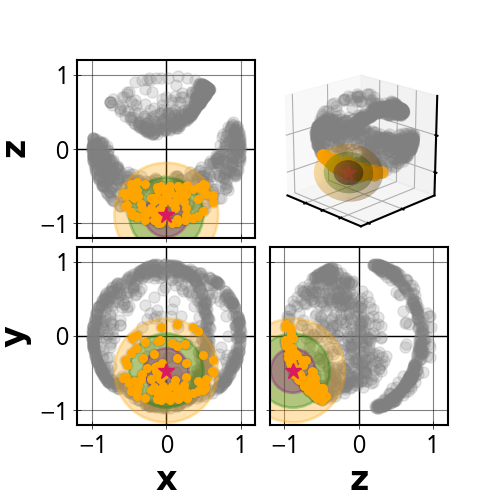

In [53]:
incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2#)<0.7)
    +(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
#fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
c = processed_dataset_swiss[center_swiss]
fig = plt.figure(figsize=(5,5))
ax3d = fig.add_subplot(222, projection='3d', aspect='equal')
ax3d.plot(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], "o",c="gray",alpha=0.2,zorder=2.1)
ax3d.plot(processed_dataset_swiss[incirc2,0].T, processed_dataset_swiss[incirc2,1].T, processed_dataset_swiss[incirc2,2].T, marker="o", color="orange", alpha=0.5 ,zorder=2.5)
ax3d.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], '*',c=myR, ms=12,zorder=2.8)
ax3d.plot_surface(x_sp*0.3+c[0], y_sp*0.3+c[1], z_sp*0.3+c[2], alpha=0.5,color= "purple", shade=True, zorder=2.4)
ax3d.plot_surface(x_sp*0.5+c[0], y_sp*0.5+c[1], z_sp*0.5+c[2], alpha=0.2,color= "green", shade=True, zorder=2.3)
ax3d.plot_surface(x_sp*0.7+c[0], y_sp*0.7+c[1], z_sp*0.7+c[2], alpha=0.2,color= "orange", shade=True, zorder=2.2)
ax3d.xaxis.set_tick_params(labelbottom=False)
ax3d.yaxis.set_tick_params(labelleft=False)
ax3d.zaxis.set_tick_params(labelleft=False)
ax3d.view_init(20,-45)

ax_xy = fig.add_subplot(223, aspect='equal')
ax_xy.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2,zorder=2.1)
ax_xy.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" ,zorder=2.5)
ax_xy.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], '*',c=myR, ms=12,zorder=2.6)
circle0 = Circle((c[0],c[1]), 0.3, color="purple", fill=True, lw = 2,zorder=2.4, alpha=0.3)
circle1 = Circle((c[0],c[1]), 0.5, color="green", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle2 = Circle((c[0],c[1]), 0.7, color="orange", fill=True, lw = 2,zorder=2.2, alpha=0.3)
ax_xy.add_patch(circle0)
ax_xy.add_patch(circle1)
ax_xy.add_patch(circle2)
ax_xy.set_xlim(-1.2,1.2)
ax_xy.set_ylim(-1.2,1.2)
ax_xy.grid(True)

ax_xz = fig.add_subplot(221, sharex = ax_xy, aspect='equal')
ax_xz.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,2],marker="o",color="gray",alpha=0.2,zorder=2.1)
ax_xz.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,2], marker="o", s=30, c="orange",zorder=2.5 )
ax_xz.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,2], '*',c=myR, ms=12,zorder=2.6)
ax_xz.xaxis.set_tick_params(labelbottom=False)
circle0 = Circle((c[0],c[2]), 0.3, color="purple", fill=True, lw = 2,zorder=2.4, alpha=0.3)
circle1 = Circle((c[0],c[2]), 0.5, color="green", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle2 = Circle((c[0],c[2]), 0.7, color="orange", fill=True, lw = 2,zorder=2.2, alpha=0.3)
ax_xz.add_patch(circle0)
ax_xz.add_patch(circle1)
ax_xz.add_patch(circle2)
ax_xz.set_xlim(-1.2,1.2)
ax_xz.set_ylim(-1.2,1.2)
ax_xz.grid(True)

ax_yz = fig.add_subplot(224, sharey = ax_xy, aspect='equal')
ax_yz.scatter(processed_dataset_swiss[:,2], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2,zorder=2.1)
ax_yz.scatter(processed_dataset_swiss[incirc2,2], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" ,zorder=2.5)
ax_yz.plot(processed_dataset_swiss[center_swiss,2], processed_dataset_swiss[center_swiss,1], '*',c=myR, ms=12,zorder=2.6)
ax_yz.yaxis.set_tick_params(labelleft=False)
circle0 = Circle((c[2],c[1]), 0.3, color="purple", fill=True, lw = 2,zorder=2.4, alpha=0.3)
circle1 = Circle((c[2],c[1]), 0.5, color="green", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle2 = Circle((c[2],c[1]), 0.7, color="orange", fill=True, lw = 2,zorder=2.2, alpha=0.3)
ax_yz.add_patch(circle0)
ax_yz.add_patch(circle1)
ax_yz.add_patch(circle2)
ax_yz.set_xlim(-1.2,1.2)
ax_yz.set_ylim(-1.2,1.2)
ax_yz.grid(True)

ax_xy.axvline(0, color='k', linewidth=1, zorder=0)
ax_xy.axhline(0, color='k', linewidth=1, zorder=0)

ax_xz.axvline(0, color='k', linewidth=1, zorder=0)
ax_xz.axhline(0, color='k', linewidth=1, zorder=0)

ax_yz.axvline(0, color='k', linewidth=1, zorder=0)
ax_yz.axhline(0, color='k', linewidth=1, zorder=0)

#circle0 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.3, color="purple", fill=False, lw = 2)
#ax.add_patch(circle0)
#circle1 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.5, color="green", fill=False, lw = 2)
#ax.add_patch(circle1)
#circle2 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.7, color="C0", fill=False, lw = 2)
#ax.add_patch(circle2)

#ax.scatter(processed_dataset_swiss[incirc1,0], processed_dataset_swiss[incirc1,1], marker="o", s=20, c="green", alpha=0.6)
#ax.scatter(processed_dataset_swiss[incirc0,0], processed_dataset_swiss[incirc0,1], marker="o", s=10, c="purple", alpha=0.5)
ax3d.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_xy.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_xz.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_yz.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)

ax_xy.set_xlabel(r"$\mathbf{x}$", fontsize="large")
ax_xy.set_ylabel(r"$\mathbf{y}$",fontsize="large")
ax_xz.set_ylabel(r"$\mathbf{z}$",fontsize="large")
ax_yz.set_xlabel(r"$\mathbf{z}$",fontsize="large")
#plt.savefig("FCI_dataset_swiss_processed_circles.pdf")
plt.subplots_adjust(bottom=0.15,  left=0.15, hspace=0.05, wspace = 0.05)
plt.show()

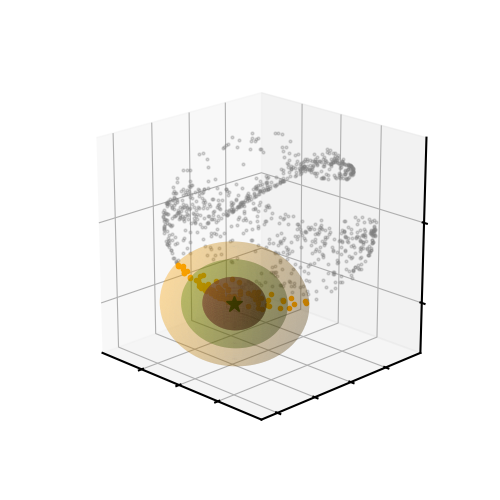

In [54]:
incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2#)<0.7)
    +(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
#fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
c = processed_dataset_swiss[center_swiss]
fig = plt.figure(figsize=(5,5))
ax3d = fig.add_subplot(projection='3d', aspect='equal')
ax3d.plot(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], "o",c="gray",alpha=0.3,zorder=2.1,ms=2)
ax3d.plot(processed_dataset_swiss[incirc2,0].T, processed_dataset_swiss[incirc2,1].T, processed_dataset_swiss[incirc2,2].T, "o", color="orange" ,zorder=2.5, ms=3)
ax3d.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], '*',c="k", ms=12,zorder=2.8)
ax3d.plot_surface(x_sp*0.3+c[0], y_sp*0.3+c[1], z_sp*0.3+c[2], alpha=0.5,color= "purple", shade=True, zorder=2.4)
ax3d.plot_surface(x_sp*0.5+c[0], y_sp*0.5+c[1], z_sp*0.5+c[2], alpha=0.2,color= "green", shade=True, zorder=2.3)
ax3d.plot_surface(x_sp*0.7+c[0], y_sp*0.7+c[1], z_sp*0.7+c[2], alpha=0.2,color= "orange", shade=True, zorder=2.2)
ax3d.xaxis.set_tick_params(labelbottom=False)
ax3d.yaxis.set_tick_params(labelleft=False)
ax3d.zaxis.set_tick_params(labelleft=False)
ax3d.view_init(20,-45)

In [55]:
i = 1
k = 2500
dataset_swiss = swiss_roll[indexes_neighborhood_swiss[i,:k]]
processed_dataset_swiss = pyFCI.center_and_normalize(dataset_swiss)

In [56]:
print(centers[i])
print(swiss_roll[centers[i]])
print(dataset_swiss[0])

2018
[  2.33323597   5.6394542  -10.95972323]
[  2.33323597   5.6394542  -10.95972323]


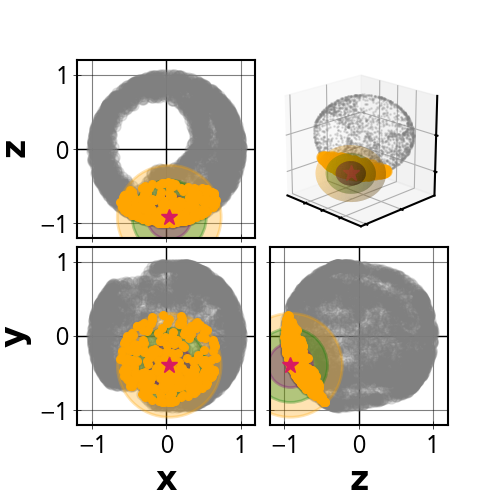

In [57]:
incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2#)<0.7)
    +(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
#fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
c = processed_dataset_swiss[center_swiss]
fig = plt.figure(figsize=(5,5))
ax3d = fig.add_subplot(222, projection='3d', aspect='equal')
ax3d.plot(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], "o",c="gray",alpha=0.2,zorder=2.1,ms=1)
ax3d.plot(processed_dataset_swiss[incirc2,0].T, processed_dataset_swiss[incirc2,1].T, processed_dataset_swiss[incirc2,2].T, marker="o", color="orange", alpha=0.5 ,zorder=2.5)
ax3d.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], '*',c=myR, ms=12,zorder=2.8)
ax3d.plot_surface(x_sp*0.3+c[0], y_sp*0.3+c[1], z_sp*0.3+c[2], alpha=0.5,color= "purple", shade=True, zorder=2.4)
ax3d.plot_surface(x_sp*0.5+c[0], y_sp*0.5+c[1], z_sp*0.5+c[2], alpha=0.2,color= "green", shade=True, zorder=2.3)
ax3d.plot_surface(x_sp*0.7+c[0], y_sp*0.7+c[1], z_sp*0.7+c[2], alpha=0.2,color= "orange", shade=True, zorder=2.2)
ax3d.xaxis.set_tick_params(labelbottom=False)
ax3d.yaxis.set_tick_params(labelleft=False)
ax3d.zaxis.set_tick_params(labelleft=False)
ax3d.view_init(20,-45)

ax_xy = fig.add_subplot(223, aspect='equal')
ax_xy.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2,zorder=2.1)
ax_xy.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" ,zorder=2.5)
ax_xy.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], '*',c=myR, ms=12,zorder=2.6)
circle0 = Circle((c[0],c[1]), 0.3, color="purple", fill=True, lw = 2,zorder=2.4, alpha=0.3)
circle1 = Circle((c[0],c[1]), 0.5, color="green", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle2 = Circle((c[0],c[1]), 0.7, color="orange", fill=True, lw = 2,zorder=2.2, alpha=0.3)
ax_xy.add_patch(circle0)
ax_xy.add_patch(circle1)
ax_xy.add_patch(circle2)
ax_xy.set_xlim(-1.2,1.2)
ax_xy.set_ylim(-1.2,1.2)
ax_xy.grid(True)

ax_xz = fig.add_subplot(221, sharex = ax_xy, aspect='equal')
ax_xz.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,2],marker="o",color="gray",alpha=0.2,zorder=2.1)
ax_xz.scatter(processed_dataset_swiss[incirc2,0], processed_dataset_swiss[incirc2,2], marker="o", s=30, c="orange",zorder=2.5 )
ax_xz.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,2], '*',c=myR, ms=12,zorder=2.6)
ax_xz.xaxis.set_tick_params(labelbottom=False)
circle0 = Circle((c[0],c[2]), 0.3, color="purple", fill=True, lw = 2,zorder=2.4, alpha=0.3)
circle1 = Circle((c[0],c[2]), 0.5, color="green", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle2 = Circle((c[0],c[2]), 0.7, color="orange", fill=True, lw = 2,zorder=2.2, alpha=0.3)
ax_xz.add_patch(circle0)
ax_xz.add_patch(circle1)
ax_xz.add_patch(circle2)
ax_xz.set_xlim(-1.2,1.2)
ax_xz.set_ylim(-1.2,1.2)
ax_xz.grid(True)

ax_yz = fig.add_subplot(224, sharey = ax_xy, aspect='equal')
ax_yz.scatter(processed_dataset_swiss[:,2], processed_dataset_swiss[:,1], marker="o",c="gray",alpha=0.2,zorder=2.1)
ax_yz.scatter(processed_dataset_swiss[incirc2,2], processed_dataset_swiss[incirc2,1], marker="o", s=30, c="orange" ,zorder=2.5)
ax_yz.plot(processed_dataset_swiss[center_swiss,2], processed_dataset_swiss[center_swiss,1], '*',c=myR, ms=12,zorder=2.6)
ax_yz.yaxis.set_tick_params(labelleft=False)
circle0 = Circle((c[2],c[1]), 0.3, color="purple", fill=True, lw = 2,zorder=2.4, alpha=0.3)
circle1 = Circle((c[2],c[1]), 0.5, color="green", fill=True, lw = 2,zorder=2.3, alpha=0.3)
circle2 = Circle((c[2],c[1]), 0.7, color="orange", fill=True, lw = 2,zorder=2.2, alpha=0.3)
ax_yz.add_patch(circle0)
ax_yz.add_patch(circle1)
ax_yz.add_patch(circle2)
ax_yz.set_xlim(-1.2,1.2)
ax_yz.set_ylim(-1.2,1.2)
ax_yz.grid(True)

ax_xy.axvline(0, color='k', linewidth=1, zorder=0)
ax_xy.axhline(0, color='k', linewidth=1, zorder=0)

ax_xz.axvline(0, color='k', linewidth=1, zorder=0)
ax_xz.axhline(0, color='k', linewidth=1, zorder=0)

ax_yz.axvline(0, color='k', linewidth=1, zorder=0)
ax_yz.axhline(0, color='k', linewidth=1, zorder=0)

#circle0 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.3, color="purple", fill=False, lw = 2)
#ax.add_patch(circle0)
#circle1 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.5, color="green", fill=False, lw = 2)
#ax.add_patch(circle1)
#circle2 = Circle((processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1]), 0.7, color="C0", fill=False, lw = 2)
#ax.add_patch(circle2)

#ax.scatter(processed_dataset_swiss[incirc1,0], processed_dataset_swiss[incirc1,1], marker="o", s=20, c="green", alpha=0.6)
#ax.scatter(processed_dataset_swiss[incirc0,0], processed_dataset_swiss[incirc0,1], marker="o", s=10, c="purple", alpha=0.5)
ax3d.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_xy.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_xz.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax_yz.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)

ax_xy.set_xlabel(r"$\mathbf{x}$", fontsize="large")
ax_xy.set_ylabel(r"$\mathbf{y}$",fontsize="large")
ax_xz.set_ylabel(r"$\mathbf{z}$",fontsize="large")
ax_yz.set_xlabel(r"$\mathbf{z}$",fontsize="large")
#plt.savefig("FCI_dataset_swiss_processed_circles.pdf")
plt.subplots_adjust(bottom=0.15,  left=0.15, hspace=0.05, wspace = 0.05)
plt.show()

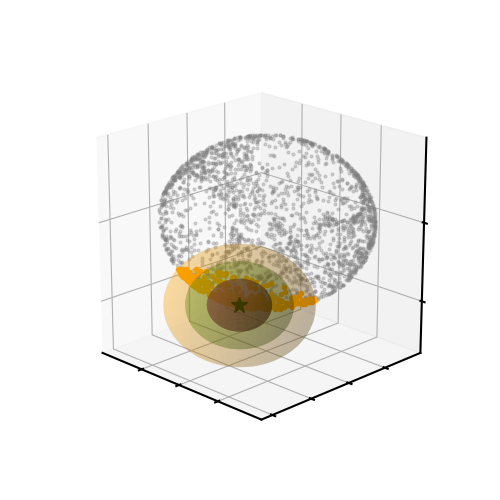

In [58]:
incirc2 = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2#)<0.7)
    +(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
#fig, ax = plt.subplots(tight_layout=True,figsize=(5,5))
c = processed_dataset_swiss[center_swiss]
fig = plt.figure(figsize=(5,5))
ax3d = fig.add_subplot(projection='3d', aspect='equal')
ax3d.plot(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], "o",c="gray",alpha=0.3,zorder=2.1,ms=2)
ax3d.plot(processed_dataset_swiss[incirc2,0].T, processed_dataset_swiss[incirc2,1].T, processed_dataset_swiss[incirc2,2].T, "o", color="orange" ,zorder=2.5, ms=3)
ax3d.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], '*',c="k", ms=12,zorder=2.8)
ax3d.plot_surface(x_sp*0.3+c[0], y_sp*0.3+c[1], z_sp*0.3+c[2], alpha=0.5,color= "purple", shade=True, zorder=2.4)
ax3d.plot_surface(x_sp*0.5+c[0], y_sp*0.5+c[1], z_sp*0.5+c[2], alpha=0.2,color= "green", shade=True, zorder=2.3)
ax3d.plot_surface(x_sp*0.7+c[0], y_sp*0.7+c[1], z_sp*0.7+c[2], alpha=0.2,color= "orange", shade=True, zorder=2.2)
ax3d.xaxis.set_tick_params(labelbottom=False)
ax3d.yaxis.set_tick_params(labelleft=False)
ax3d.zaxis.set_tick_params(labelleft=False)
ax3d.view_init(20,-45)

In [59]:
#Sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sp = 1 * np.outer(np.cos(u), np.sin(v))
y_sp = 1 * np.outer(np.sin(u), np.sin(v))
z_sp = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
insp_x = 0.7 * np.outer(np.cos(u), np.sin(v)) + processed_dataset_swiss[center_swiss,0]
insp_y = 0.7 * np.outer(np.sin(u), np.sin(v)) + processed_dataset_swiss[center_swiss,1]
insp_z = 0.7 * np.outer(np.ones(np.size(u)), np.cos(v)) + processed_dataset_swiss[center_swiss,2]

In [60]:
insp_intersect_x = 0.7 * np.outer(np.cos(u), np.sin(v)) + processed_dataset_swiss[center_swiss,0]

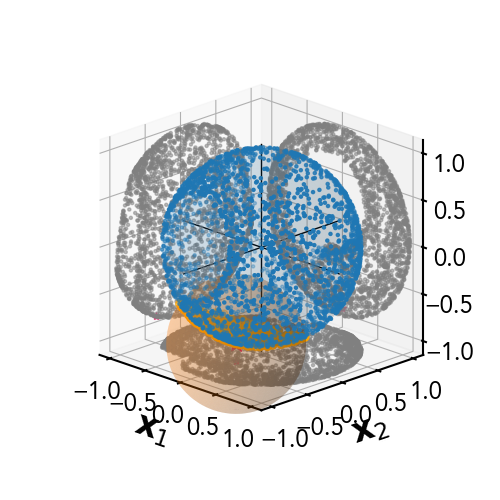

In [61]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
#ax.axvline(0, color='k', linewidth=1, zorder=0)
#ax.axhline(0, color='k', linewidth=1, zorder=0)
ax.plot((-1.1,1.1),(0,0),(0,0), color='k', linewidth=1, zorder=0,)
ax.plot((0,0),(-1.1,1.1),(0,0), color='k', linewidth=1, zorder=0,)
ax.plot((0,0),(0,0),(-1.1,1.1), color='k', linewidth=1, zorder=0,)

#ax.scatter(dataset_swiss[:,0], dataset_swiss[:,1], dataset_swiss[:,2], c="gray",marker=".",alpha=0.2)
#ax.plot(dataset_swiss[:,0].mean(), dataset_swiss[:,1].mean(), dataset_swiss[:,2].mean(), 'o',c=myR,alpha=0.3)
ax.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], marker=".")
#ax.plot(processed_dataset_swiss[:,0].mean(), processed_dataset_swiss[:,1].mean(), processed_dataset_swiss[:,2].mean(), 'o',c=myR)
ax.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], '*',c=myR, ms=12)
incirc2_3d = np.where(np.sqrt((processed_dataset_swiss[:,0]-processed_dataset_swiss[center_swiss,0])**2+(processed_dataset_swiss[:,1]-processed_dataset_swiss[center_swiss,1])**2+(processed_dataset_swiss[:,2]-processed_dataset_swiss[center_swiss,2])**2)<0.7)
ax.scatter(processed_dataset_swiss[incirc2_3d,0], processed_dataset_swiss[incirc2_3d,1], processed_dataset_swiss[incirc2_3d,2], marker="o", s=30, c="orange" )

ax.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,1], zs=-1.1,zdir="z",c="gray",marker=".",alpha=0.5)
ax.scatter(processed_dataset_swiss[:,0], processed_dataset_swiss[:,2], zs=1.1,zdir="y",c="gray",marker=".",alpha=0.5)
ax.scatter(processed_dataset_swiss[:,1], processed_dataset_swiss[:,2], zs=-1.1,zdir="x",c="gray",marker=".",alpha=0.5)

ax.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,1], zs=-1.1,zdir="z",c=myR,marker="*",ms=6,alpha=0.7)
ax.plot(processed_dataset_swiss[center_swiss,0], processed_dataset_swiss[center_swiss,2], zs=1.1,zdir="y", c=myR,marker="*",ms=6,alpha=0.7)
ax.plot(processed_dataset_swiss[center_swiss,1], processed_dataset_swiss[center_swiss,2], zs=-1.1,zdir="x",c=myR,marker="*",ms=6,alpha=0.7)
ax.plot_surface(x_sp,y_sp,z_sp, alpha=0.1)
ax.plot_surface(insp_x, insp_y, insp_z, alpha=0.2)

ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_zlim(-1.1,1.1)
ax.tick_params(direction='inout', length=6, width=0.5, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.grid(True)
ax.set_aspect('equal')
ax.set_proj_type("ortho")
ax.view_init(20,-45)
ax.set_xlabel(r"$\mathbf{x}_1$", fontsize="large")
ax.set_ylabel(r"$\mathbf{x}_2$",fontsize="large")
#plt.savefig("FCI_dataset_swiss_processed.pdf")
plt.show()

### 2D Histogram

In [62]:
from scipy.spatial import KDTree

In [63]:
def KDTree_neighbors_dist(data,n_neighbors=2):
    """
    Computes the distances to the n_neighbors nearest neighbors
    """
    tree = KDTree(data)
    dists = tree.query(data, k=n_neighbors)
    nn_dist = dists[0][:, 1:]
    return nn_dist

In [64]:
def compute_deltas(coords, barycentric_coords, meandist=None):
    if meandist is None:
        neigh_dist = KDTree_neighbors_dist(coords,20)
        meandist = np.mean(neigh_dist)
    bar_dist = np.min(cdist(coords, barycentric_coords.reshape(1,-1)))
    return bar_dist/meandist

In [65]:
#
n_centersL = 1000#
centersL = rng.choice(len(swiss_roll), size=n_centersL, replace=False)
neighborhoodsL = [50, 100, 200, 300, 500, 1000, 1500, 2000, 2500, 2900]
n_neighborsL = len(neighborhoodsL)

In [66]:
import h5py

In [67]:
compute = False

In [68]:
if compute:
    ids_swissL, distances_swissL, indexes_neighborhood_swissL = local_FCI_dist(swiss_roll, centersL, neighborhoodsL)
    with h5py.File("ids_swiss_all.h5", "w") as f:
        f["ids_swissL"] = ids_swissL
        f["distances_swissL"] = distances_swissL
        f["indexes_neighborhood_swissL"] = indexes_neighborhood_swissL
else:
    with  h5py.File("ids_swiss_all.h5", "r") as f:
        ids_swissL = f["ids_swissL"][:]
        distances_swissL = f["distances_swissL"][:]
        indexes_neighborhood_swissL = f["indexes_neighborhood_swissL"][:]
    

In [69]:
deltas_swissL = np.empty((n_centersL,n_neighborsL ))
for i in range(n_centersL):
   for j, k in enumerate(neighborhoodsL):
      sample_swiss = swiss_roll[indexes_neighborhood_swissL[i,:k]]
      bar_sample_s = sample_swiss.mean(axis=0)
      distances_swiss_s = distances_swissL[i,1:k+1]
      mean_dist_s = distances_swiss_s[:10].mean()
      deltas_swissL[i,j] = compute_deltas(sample_swiss, bar_sample_s, mean_dist_s)

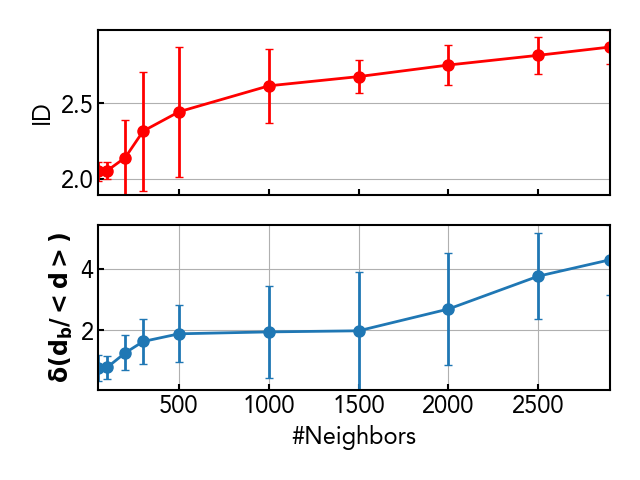

In [70]:
fig, ax = plt.subplots(2,1, sharex=True, tight_layout=True)
ax[0].errorbar(neighborhoodsL, ids_swissL[:,:,1].mean(axis=0),yerr=ids_swissL[:,:,1].std(axis=0),fmt='o-', capsize=3, lw=2,c='r')
ax[1].errorbar(neighborhoodsL, deltas_swissL.mean(axis=0),yerr=deltas_swissL.std(axis=0),fmt='o-', capsize=3, lw=2)
ax[1].set_ylabel(r"$\mathbf{\delta (d_b/<d>)}$")
#ax[1].set_xscale('log')
ax[0].grid(axis="y")
ax[1].grid("y")
ax[0].set_ylabel("ID")
ax[1].set_xlabel("#Neighbors")
plt.show()

In [71]:
ids_2d = ids_swissL[:,:,1]
goodp = ~np.isnan(ids_2d)

print(goodp.shape, ids_2d.shape, deltas_swissL.shape)

(1000, 10) (1000, 10) (1000, 10)


(10000,) (10000,)


/tmp/ipykernel_47381/2726669489.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(tight_layout=True)


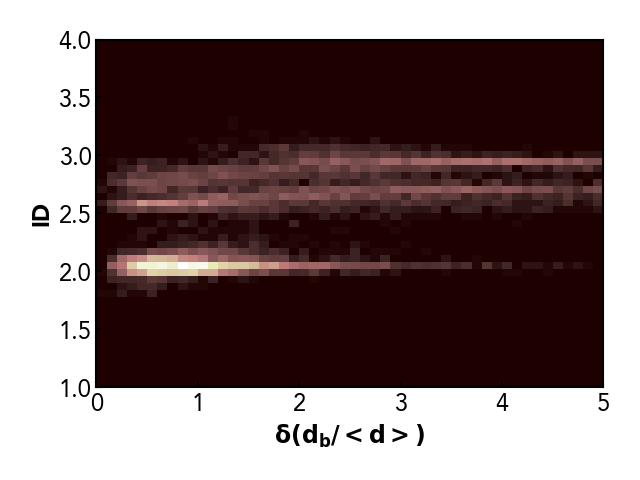

In [72]:
fig, ax = plt.subplots(tight_layout=True)
ids_2d = ids_swissL[:,:,1]
ids_clean = ids_2d[~np.isnan(ids_2d)]
deltas_clean = deltas_swissL[~np.isnan(ids_2d)]
print(ids_clean.shape, deltas_clean.shape)
#ax.scatter(deltas_swiss, ids_swiss[:,:,1], s = 1)
ax.hist2d(deltas_clean.flatten(), ids_clean.flatten(), bins=50, range=[[0,5],[1,4]], cmap='pink')#, norm=mpl.colors.LogNorm())
ax.set_xlabel(r"$\mathbf{\delta (d_b/<d>)}$",fontweight="bold",fontname="Avenir LT Std")
ax.set_ylabel("ID",fontweight="bold")
#ax.set_xlim(0,5)
#ax.set_ylim(0,10)
plt.savefig(f"{basedir}/{subdir}/2dhist_IDdelta.pdf")
plt.show()